In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [41]:
def add_features(csv):
    #csv['input_orientation_x*y'] = csv['input_orientation_x'] * csv['input_orientation_y']
    #csv['input_orientation_x*z'] = csv['input_orientation_x'] * csv['input_orientation_z']
    #csv['input_orientation_x*w'] = csv['input_orientation_x'] * csv['input_orientation_w']
    #csv['input_orientation_y*z'] = csv['input_orientation_y'] * csv['input_orientation_z']
    #csv['input_orientation_y*w'] = csv['input_orientation_y'] * csv['input_orientation_w']
    #csv['input_orientation_z*w'] = csv['input_orientation_z'] * csv['input_orientation_w']
    #csv['acceleration-x*y'] = csv['acceleration_x'] * csv['acceleration_y']
    #csv['acceleration-x*z'] = csv['acceleration_x'] * csv['acceleration_z']
    #csv['acceleration-y*z'] = csv['acceleration_y'] * csv['acceleration_z']
    #csv['acceleration-angular_vec-x*x'] = csv['acceleration_x'] - csv['angular_vec_x']
    #csv['acceleration-angular_vec-x*y'] = csv['acceleration_x'] - csv['angular_vec_y']
    #csv['acceleration-angular_vec-x*z'] = csv['acceleration_x'] - csv['angular_vec_z']
    #csv['acceleration-angular_vec-y*x'] = csv['acceleration_y'] - csv['angular_vec_x']
    #csv['acceleration-angular_vec-y*y'] = csv['acceleration_y'] - csv['angular_vec_y']
    #csv['acceleration-angular_vec-y*z'] = csv['acceleration_y'] - csv['angular_vec_z']
    #csv['acceleration-angular_vec-z*x'] = csv['acceleration_z'] - csv['angular_vec_x']
    #csv['acceleration-angular_vec-z*y'] = csv['acceleration_z'] - csv['angular_vec_y']
    #csv['acceleration-angular_vec-z*z'] = csv['acceleration_z'] - csv['angular_vec_z']
    return csv

In [43]:
def plot_heatmap(csv_or_filename):
    if csv_or_filename is str or csv_or_filename is Path:
        csv = pd.read_csv(csv_or_filename)
    else:
        csv = csv_or_filename
    using_columns = ['timestamp', 'acceleration_x', 'acceleration_y', 
                     'acceleration_z',
       'angular_vec_x', 'angular_vec_y', 'angular_vec_z',
       #'input_orientation_x', 'input_orientation_y', 'input_orientation_z','input_orientation_w', 
    'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']
    csv = csv[using_columns]
    csv = add_features(csv)
    plt.figure(figsize=(12, 12))
    sns.heatmap(csv.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
    plt.tight_layout()
    #plt.title(filename)
    plt.show()

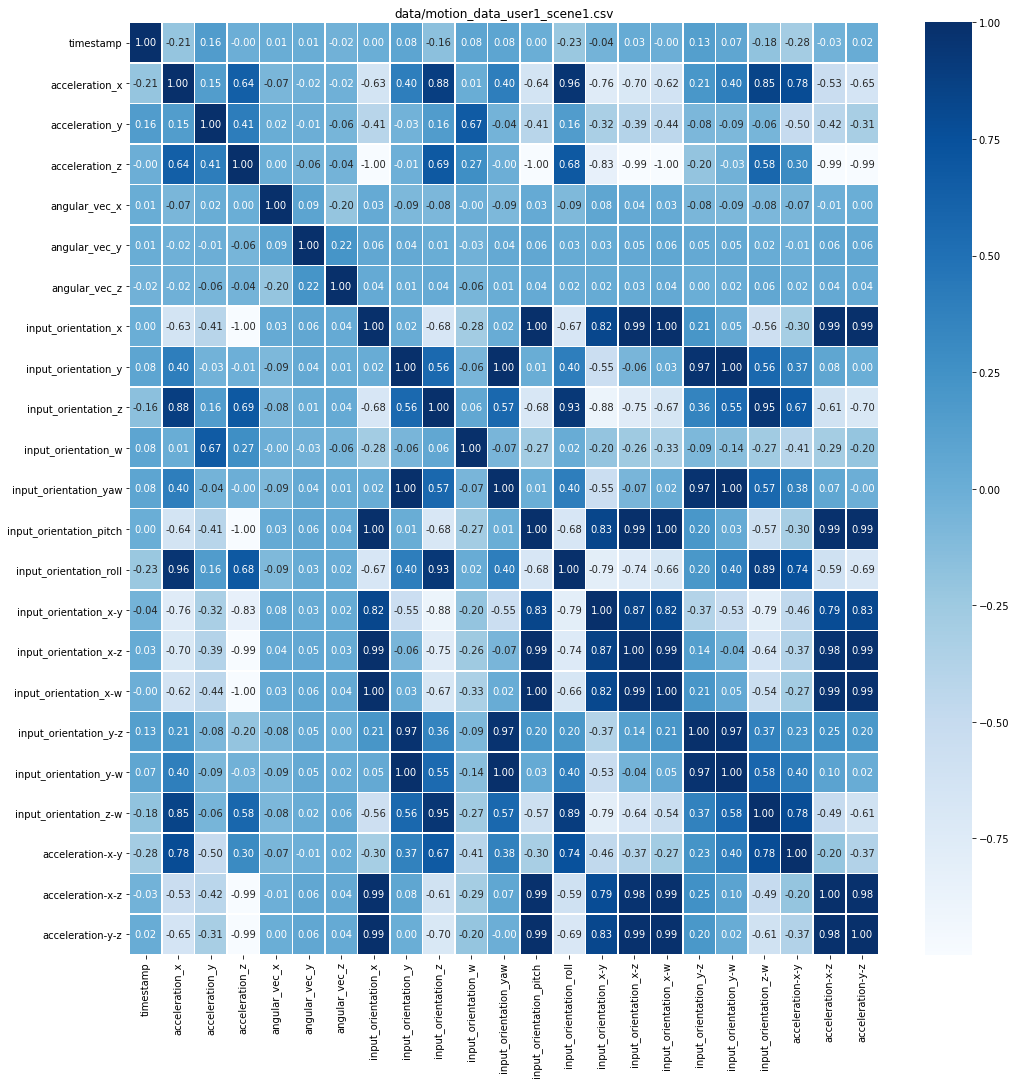

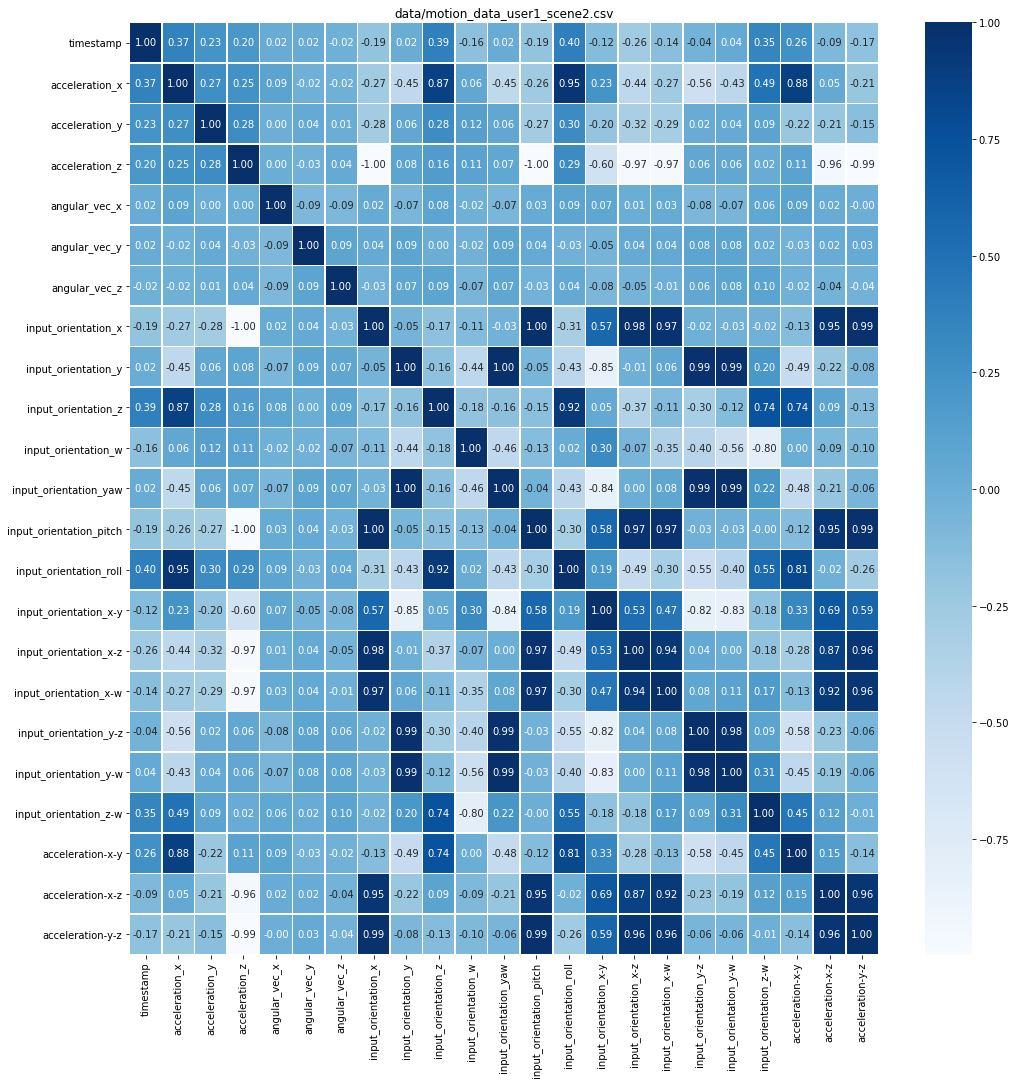

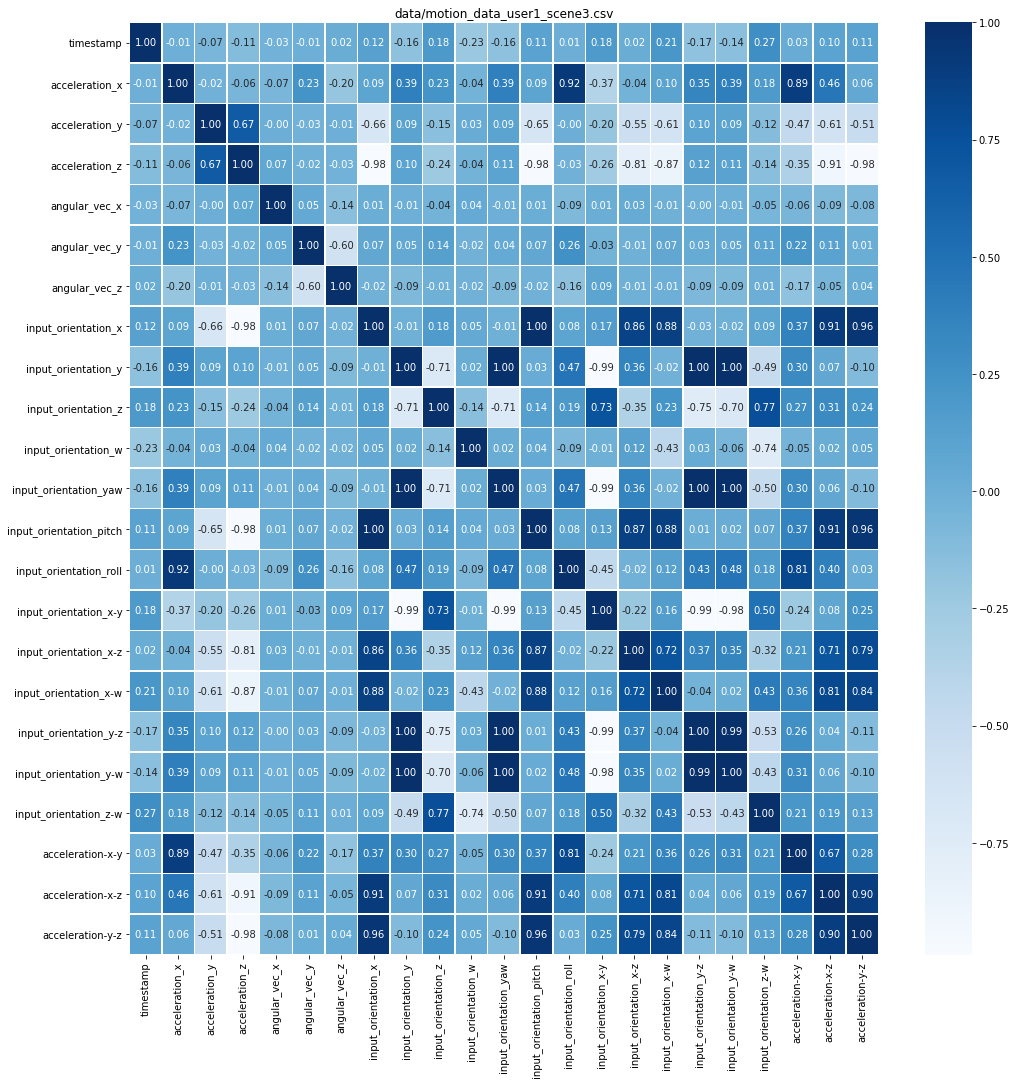

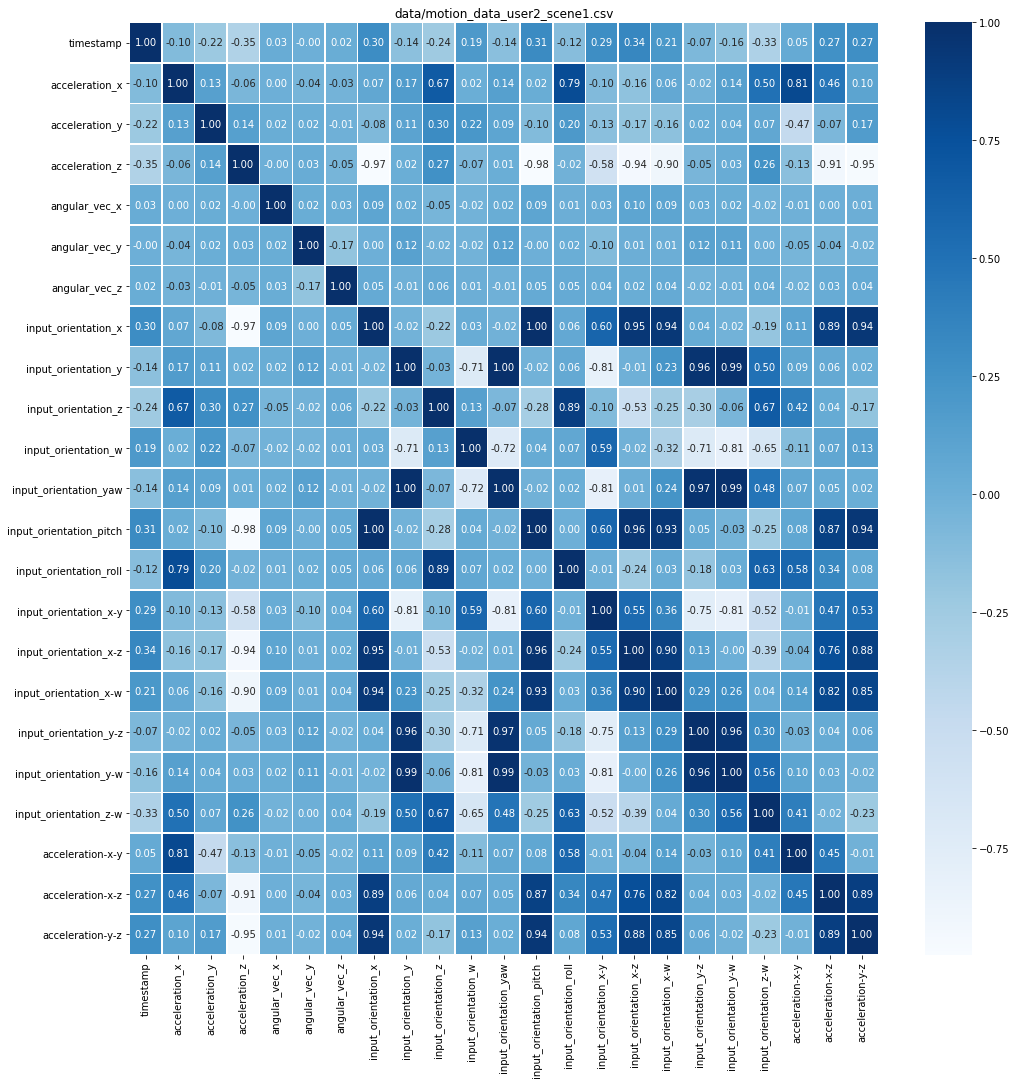

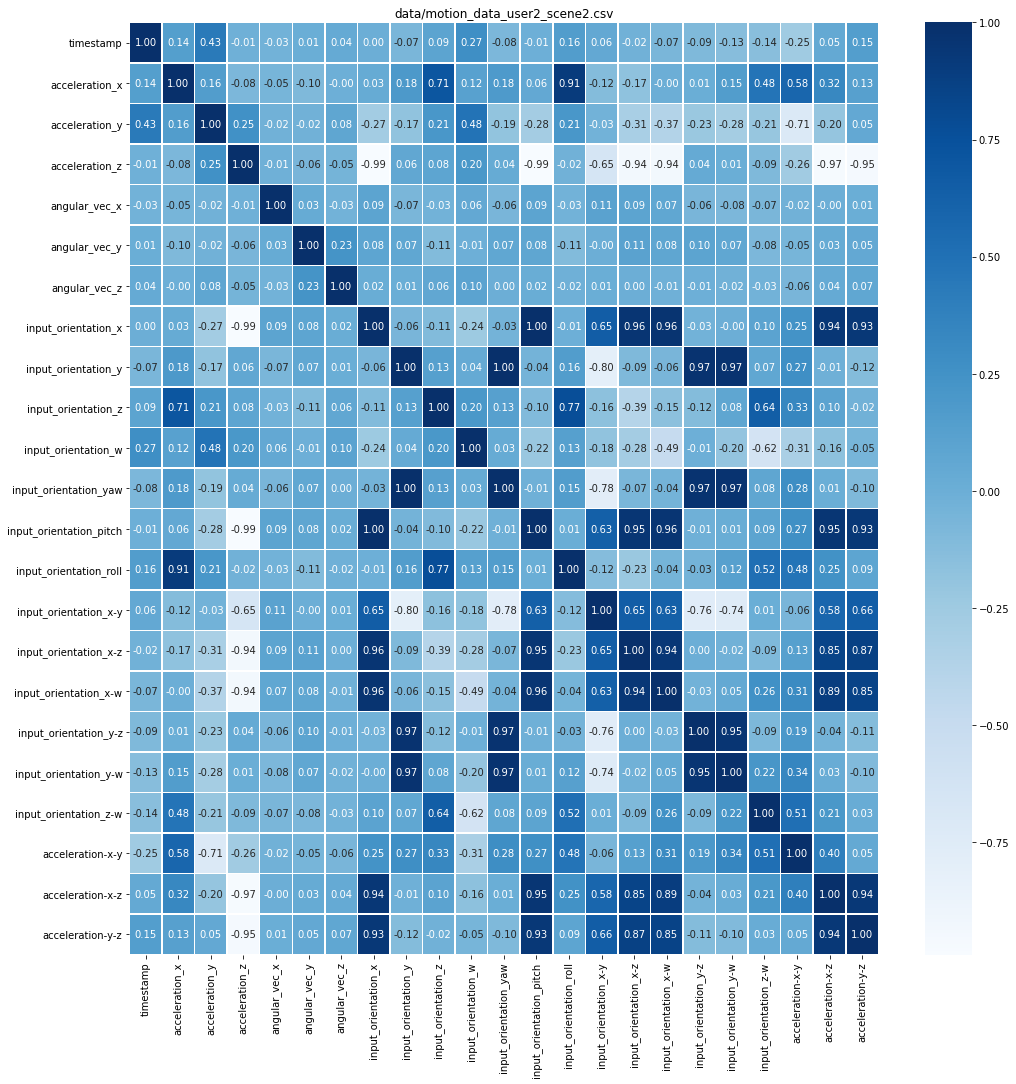

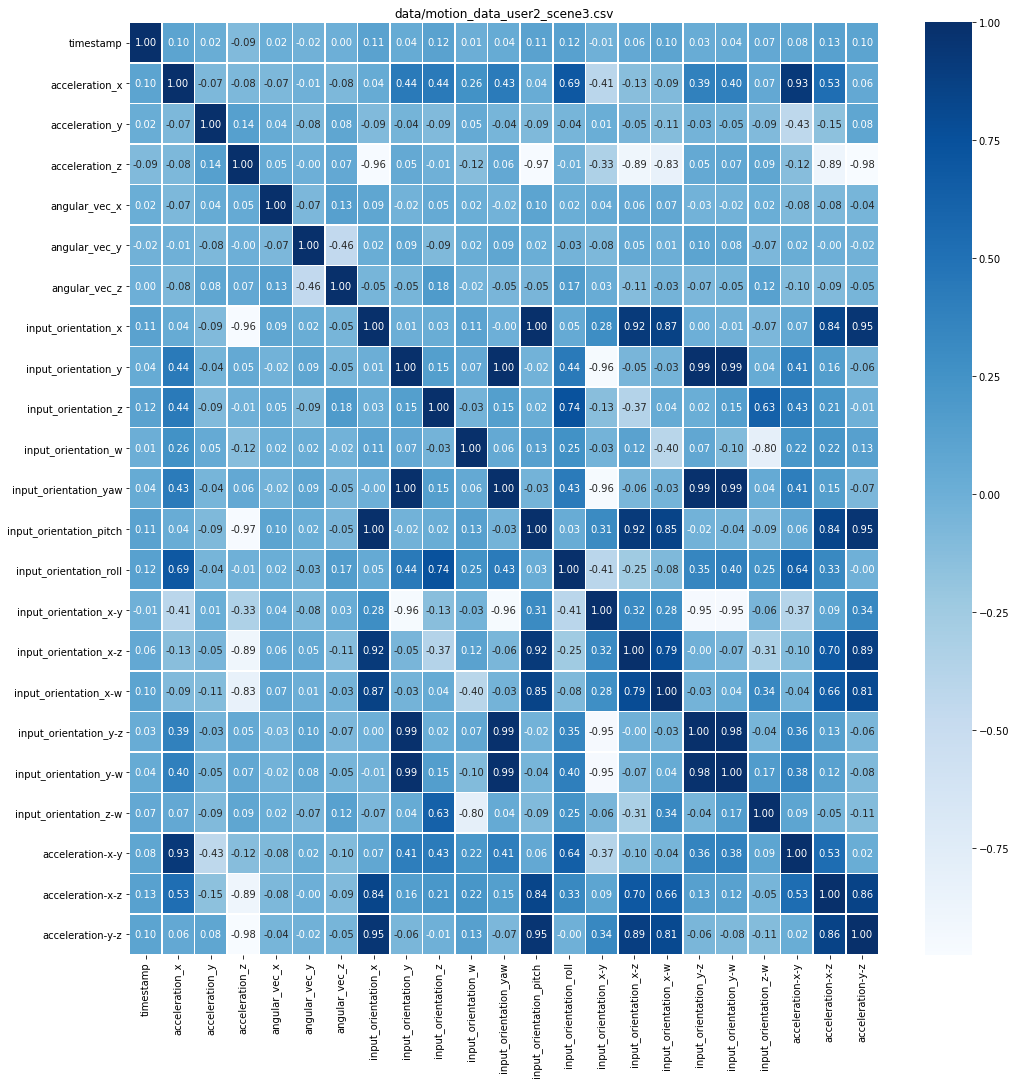

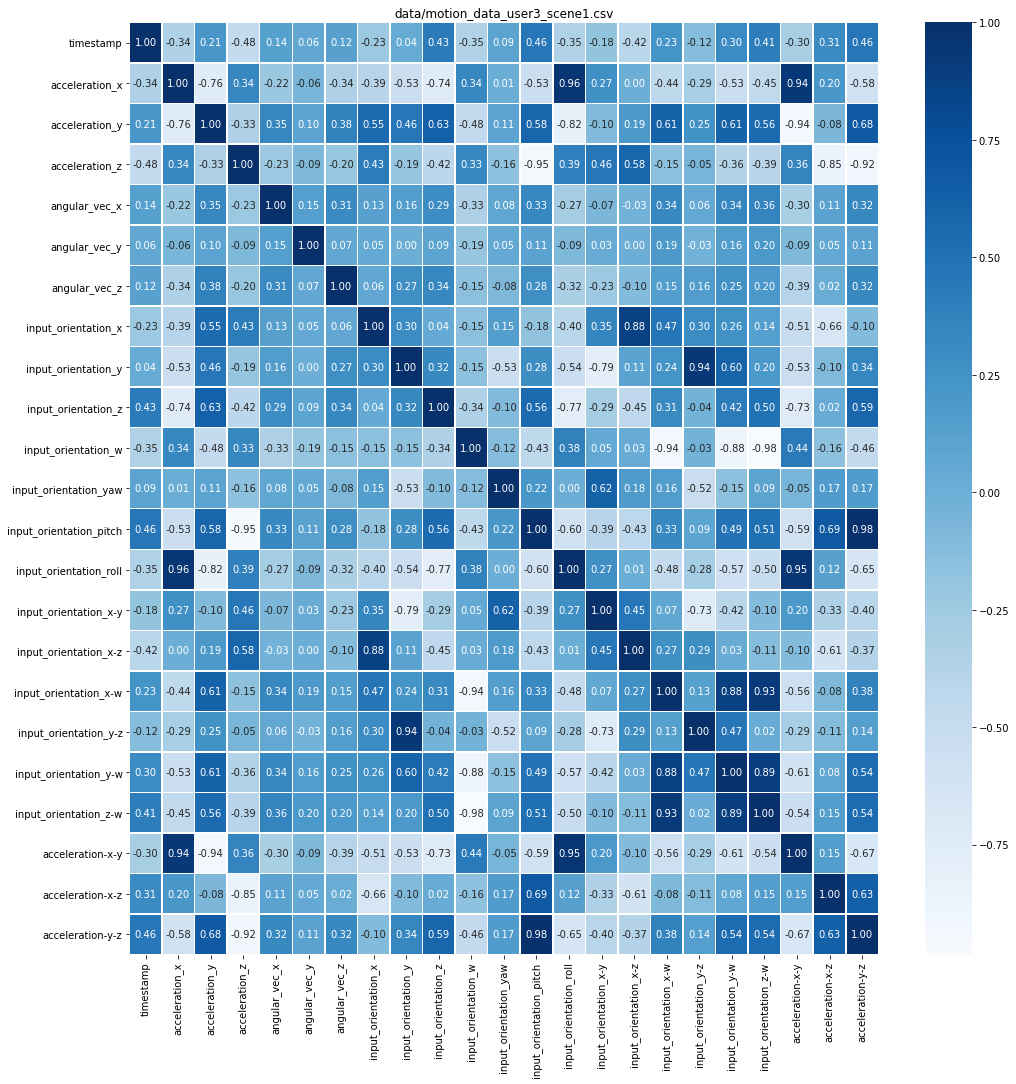

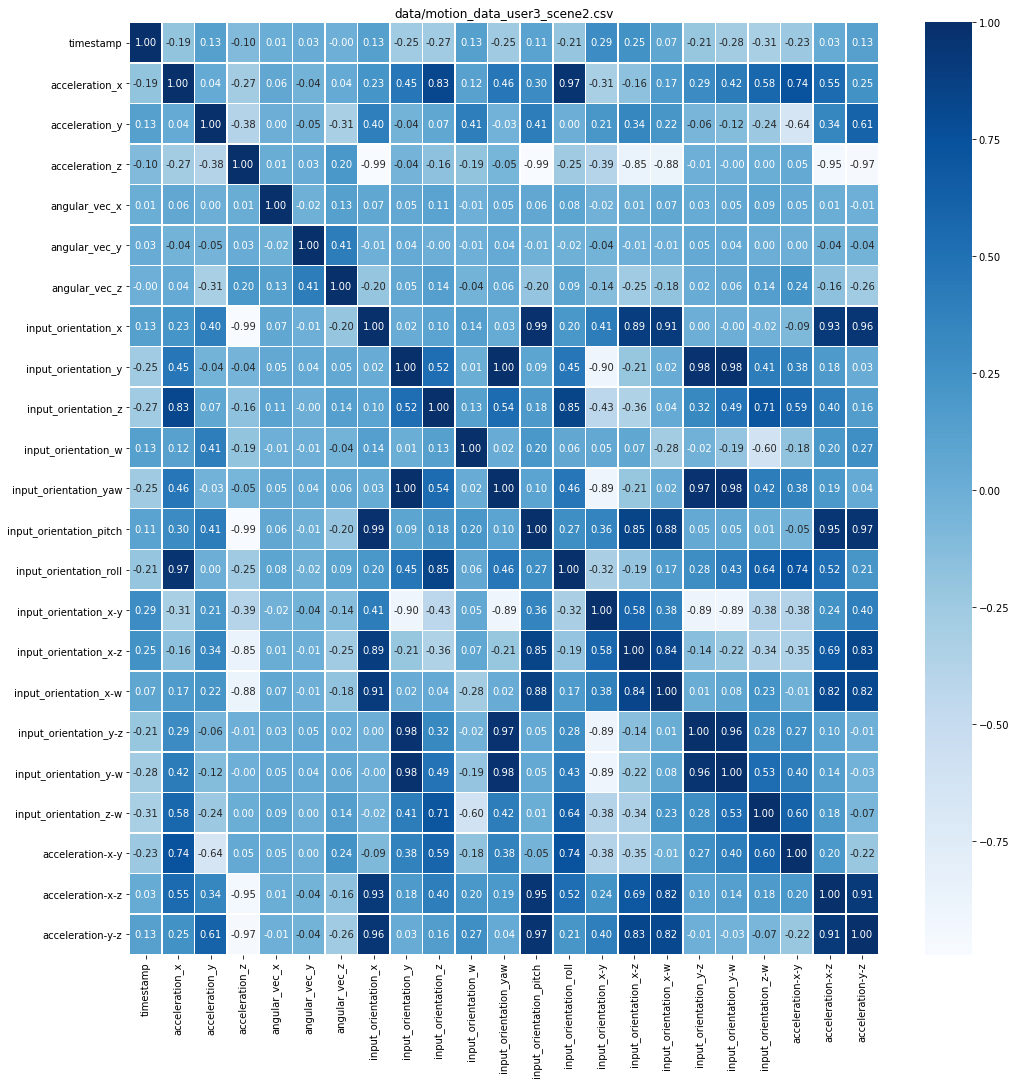

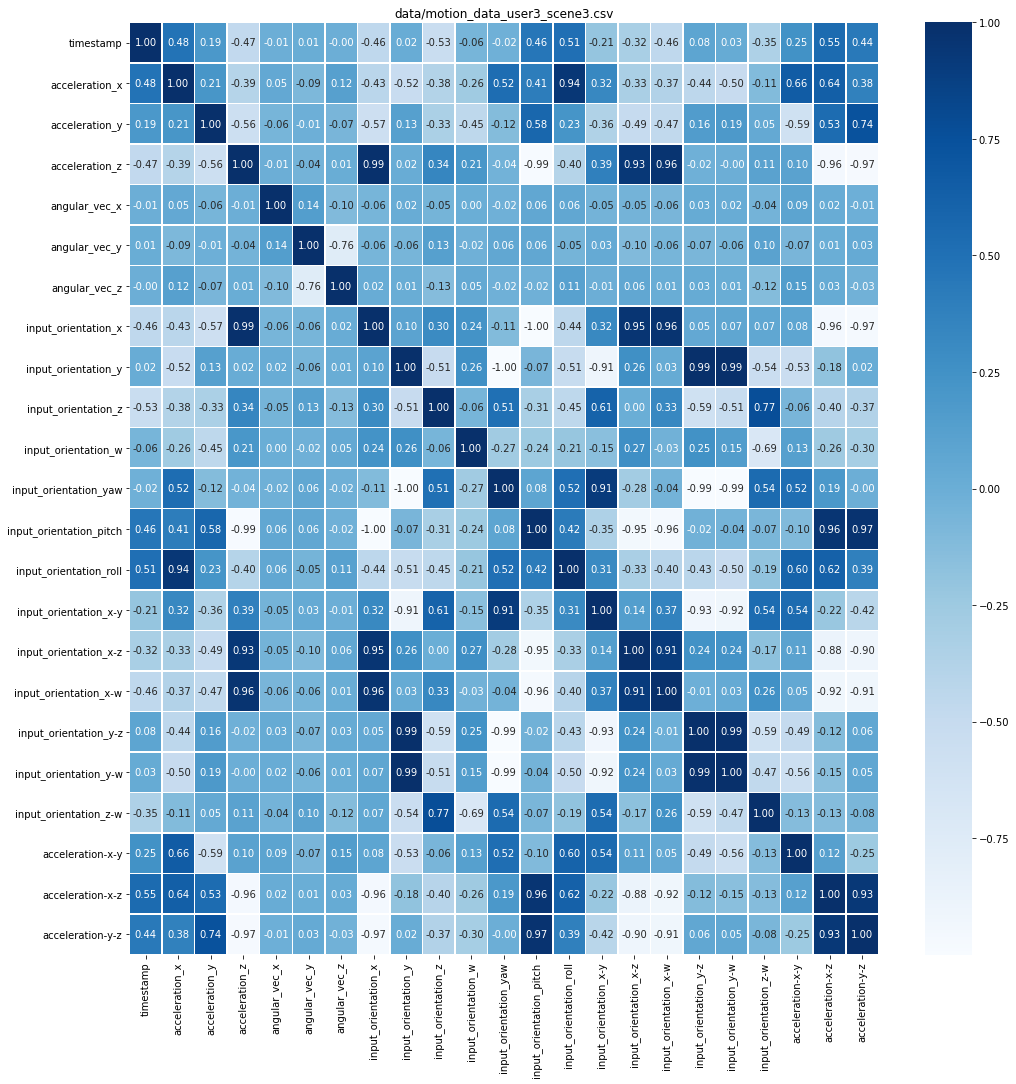

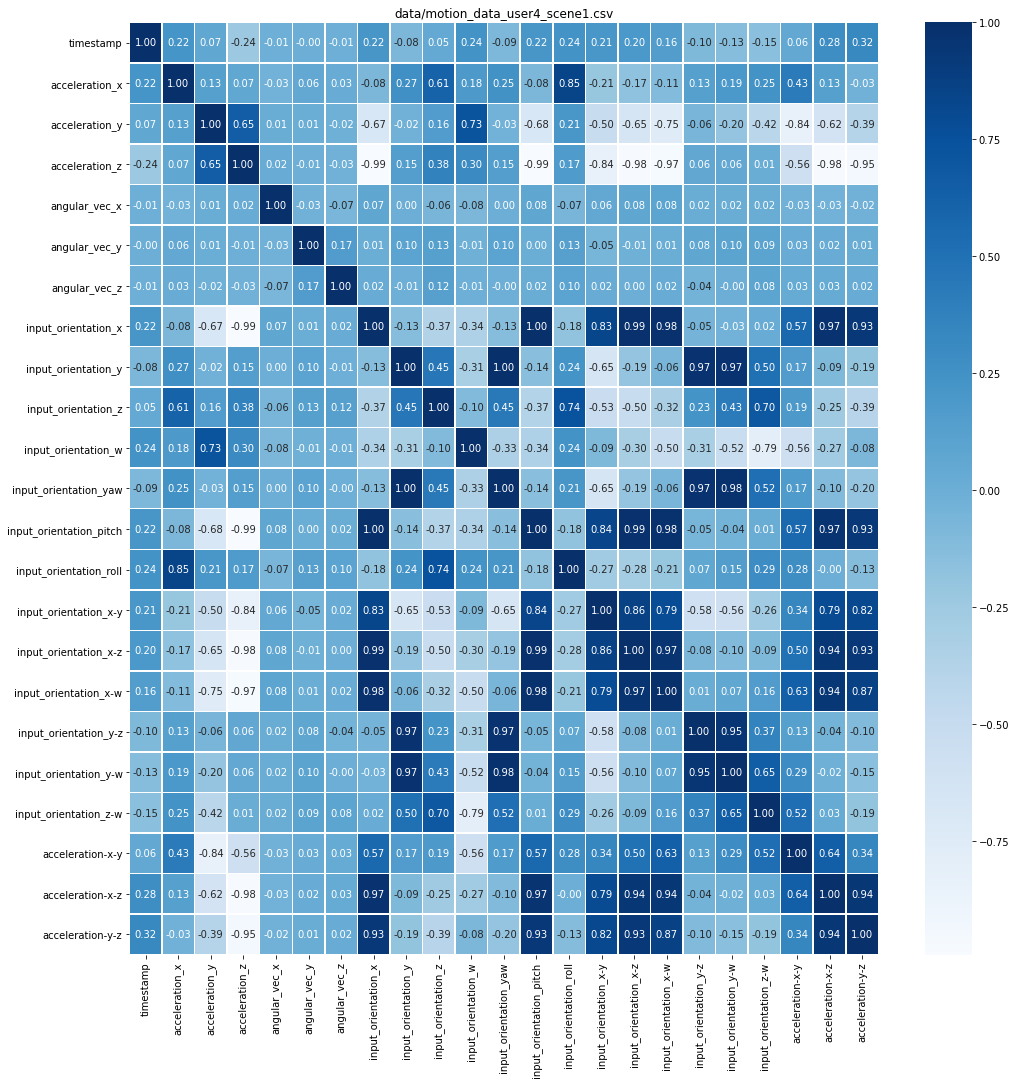

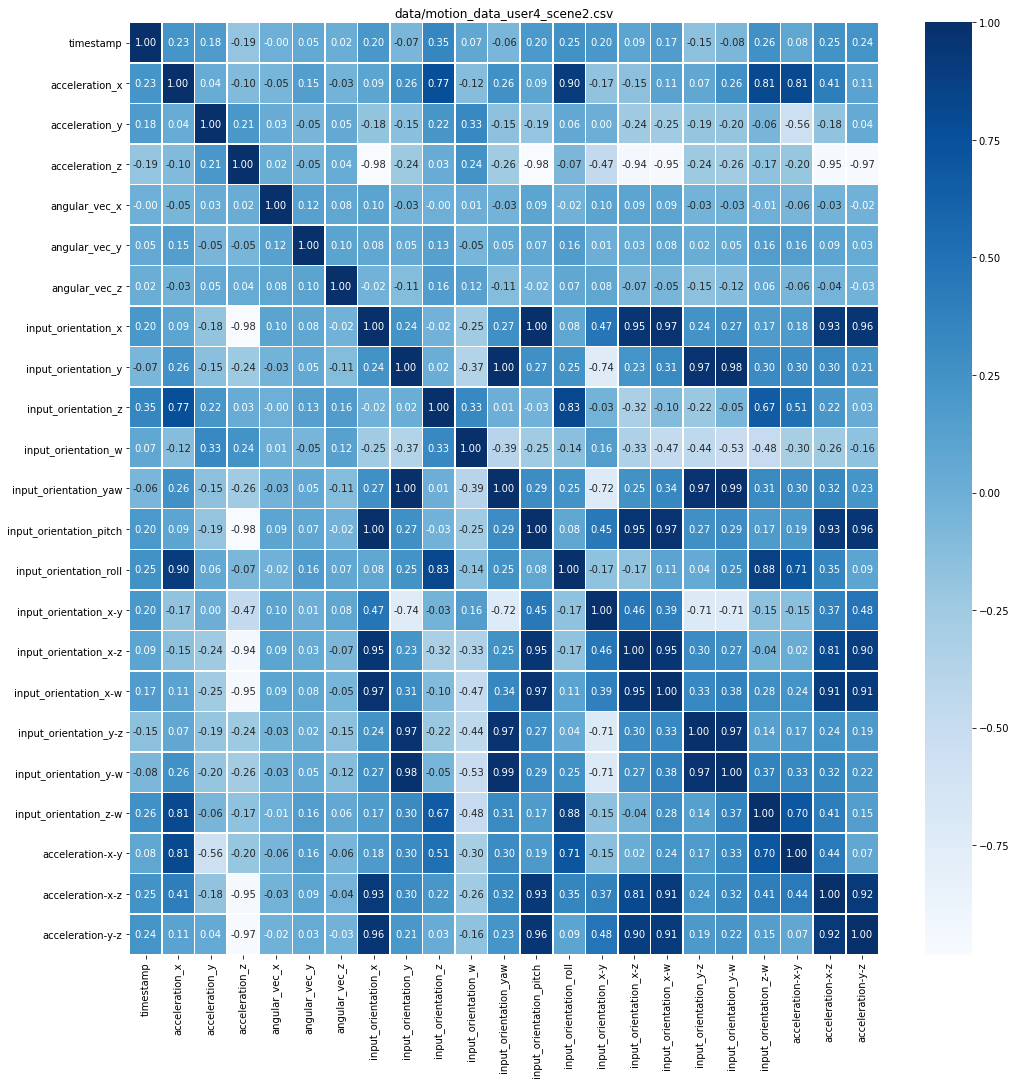

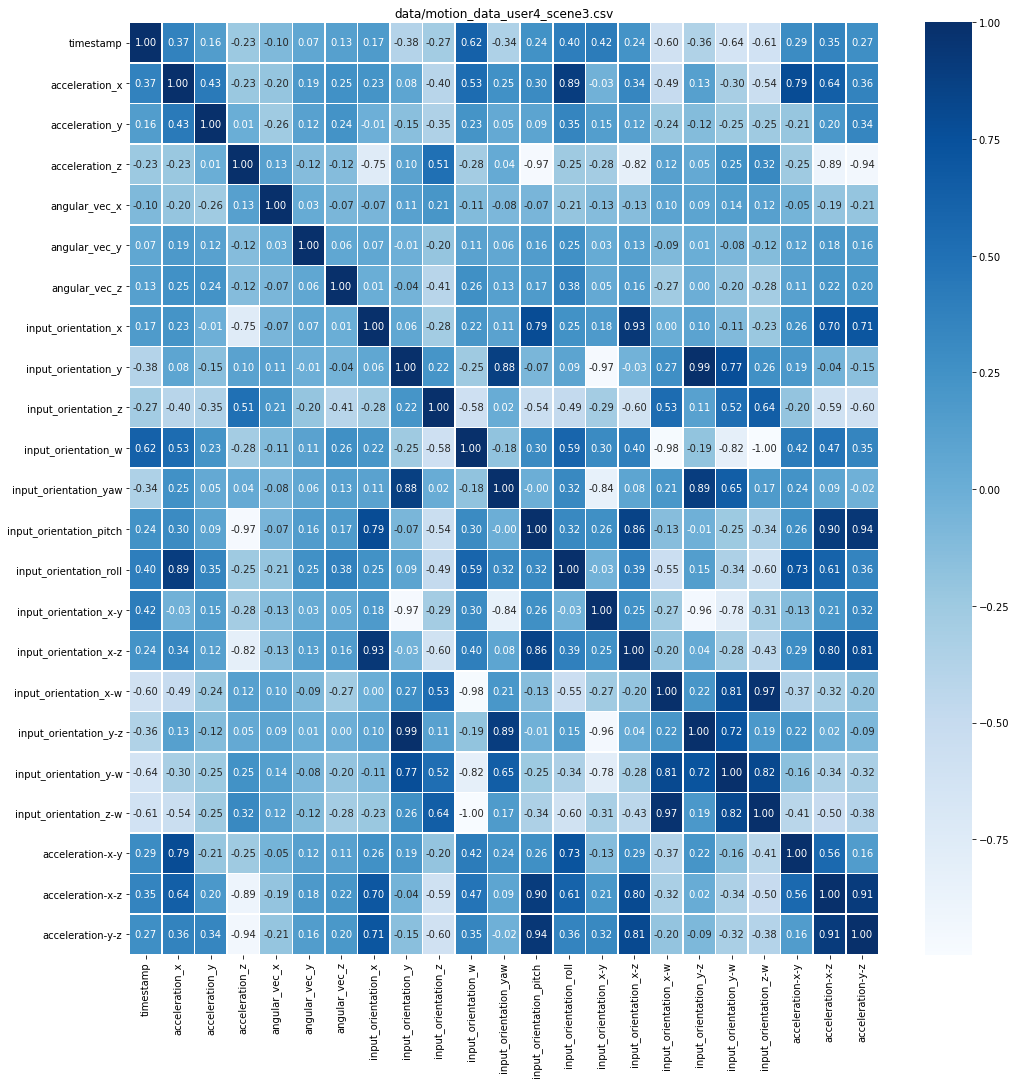

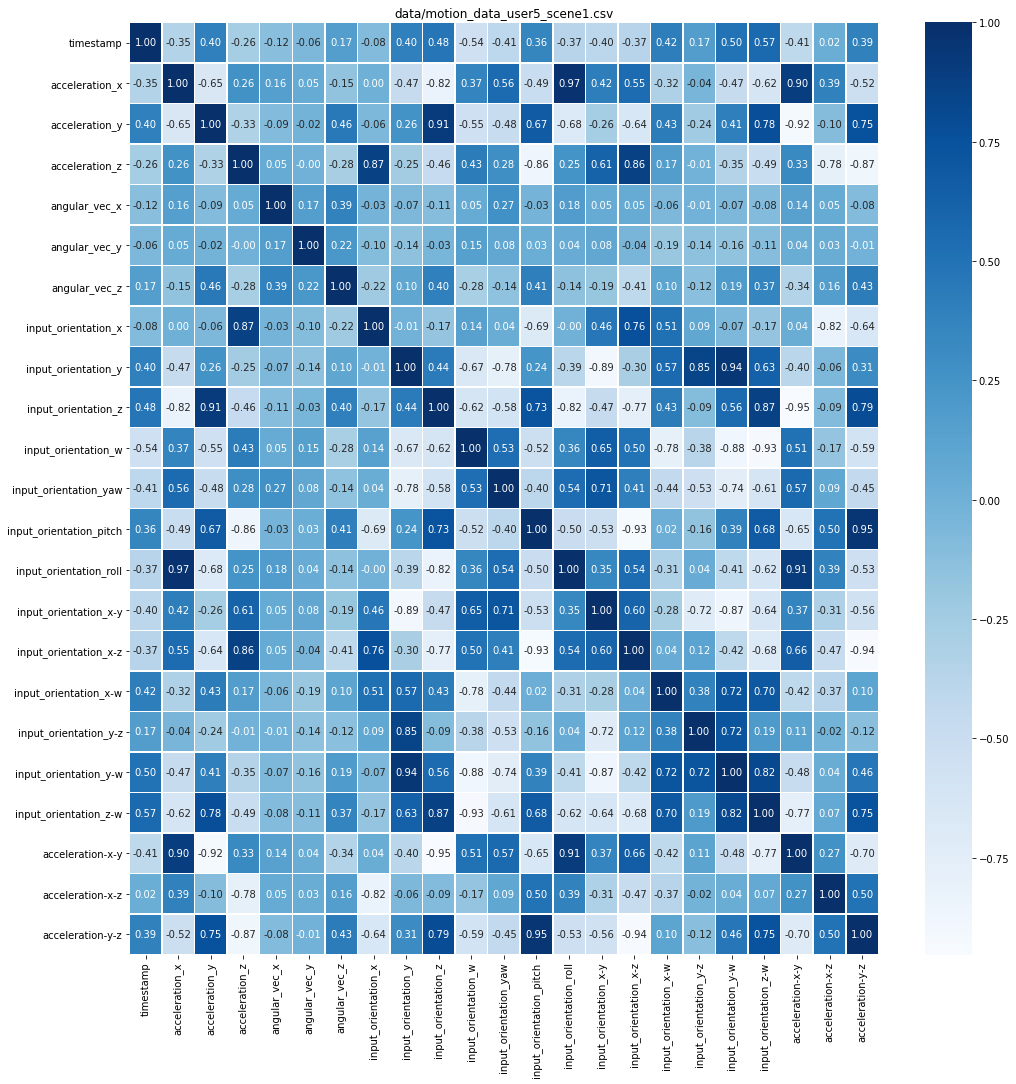

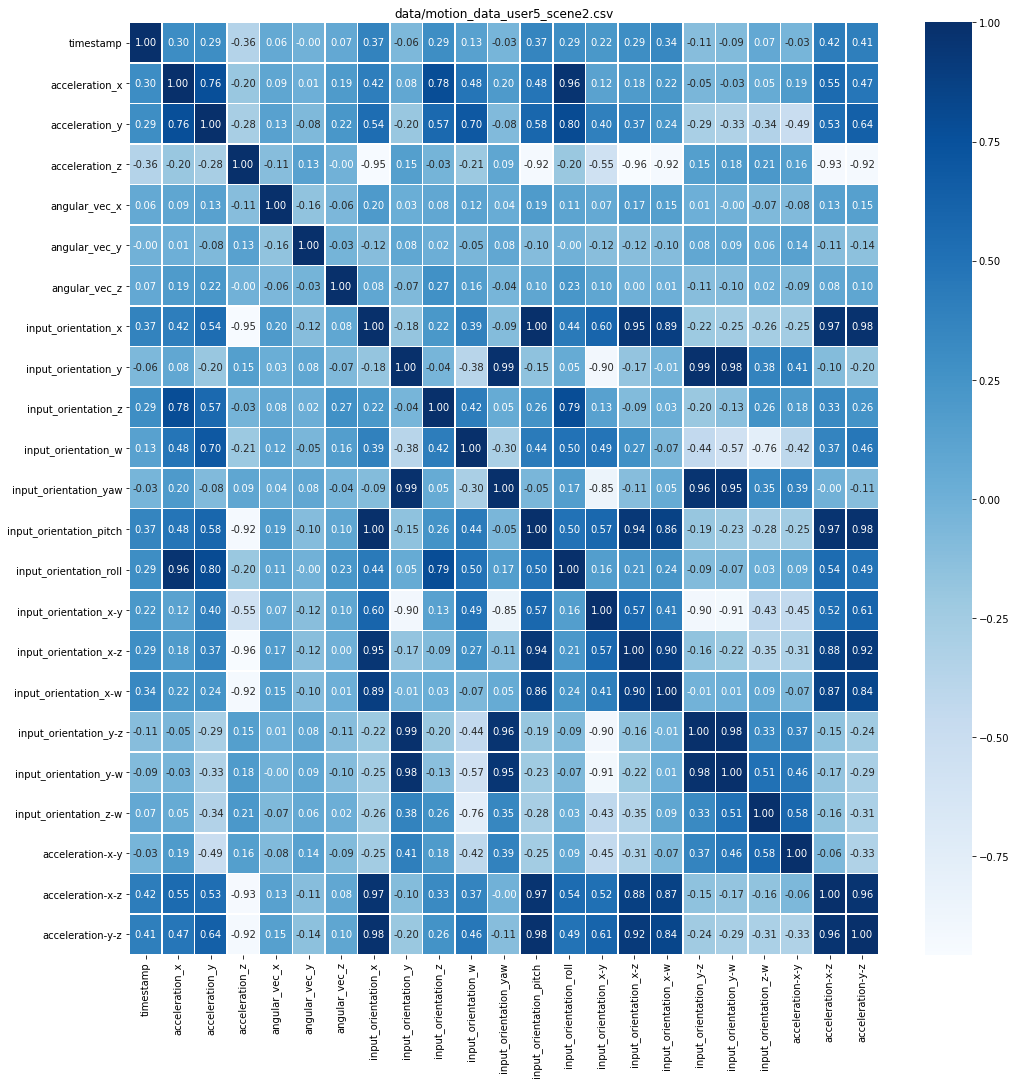

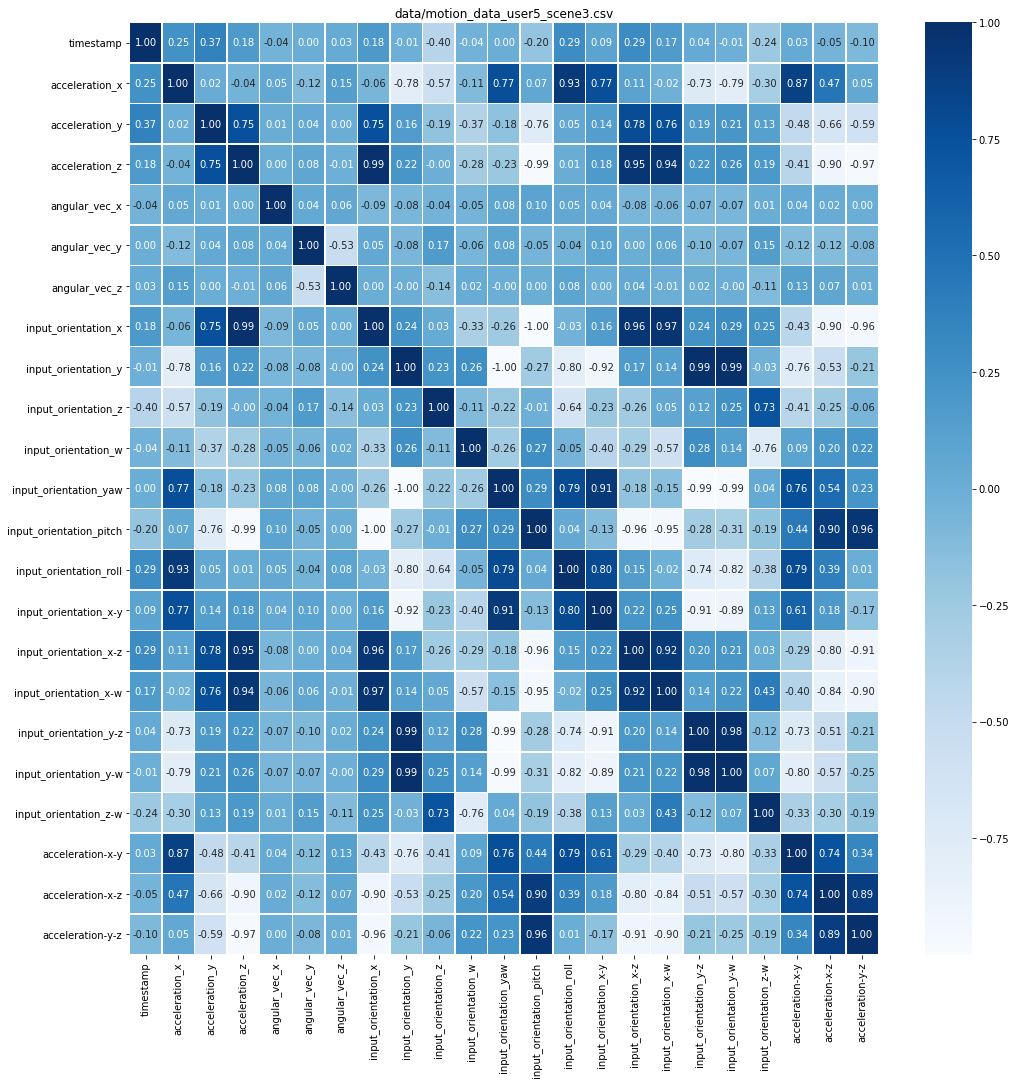

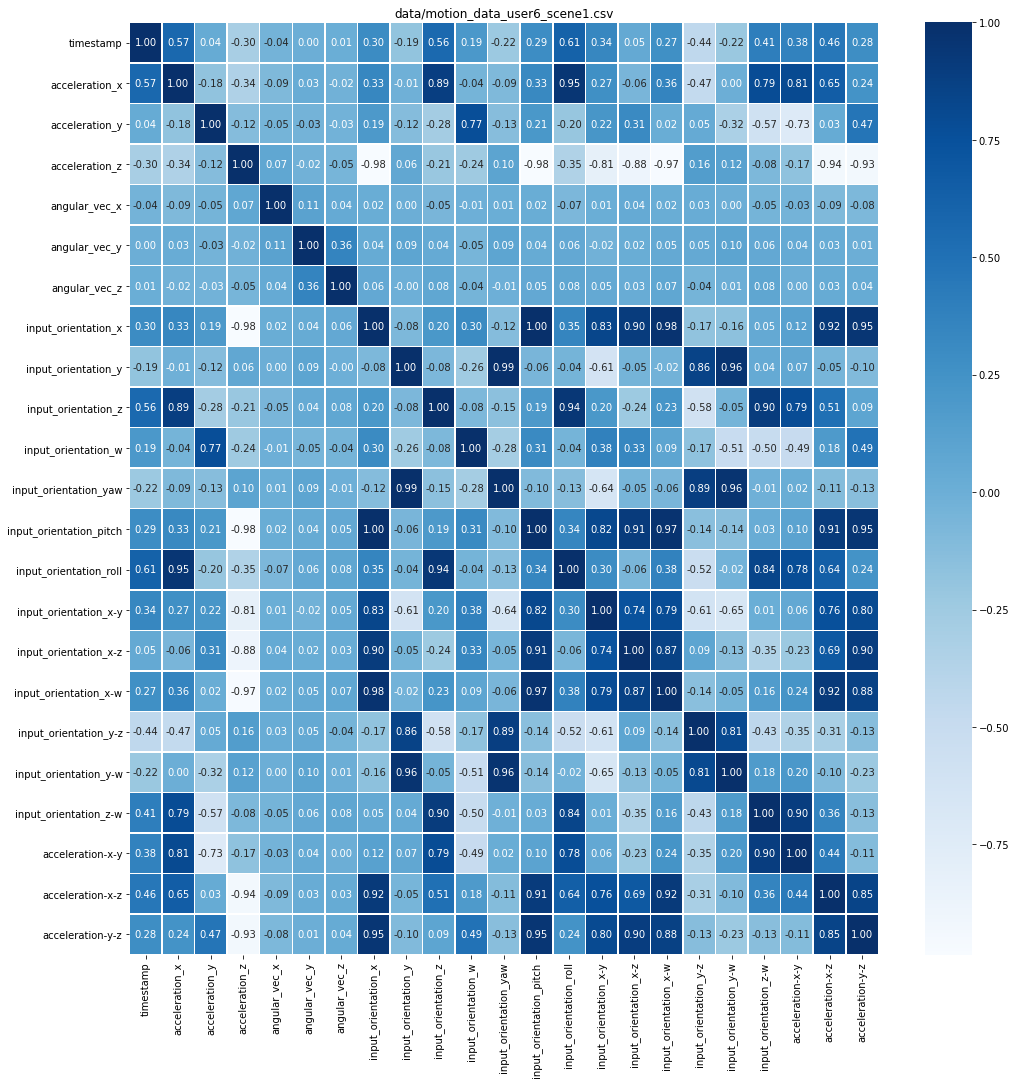

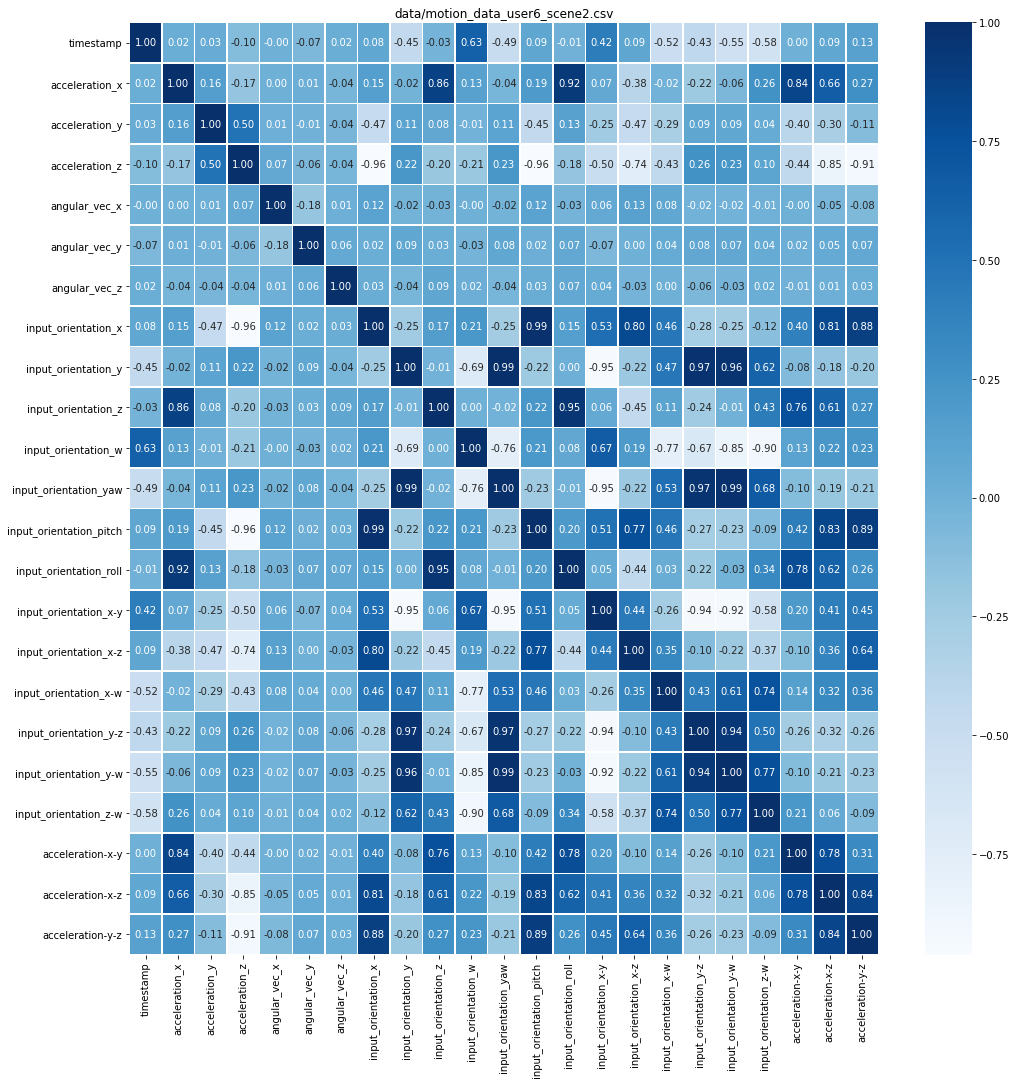

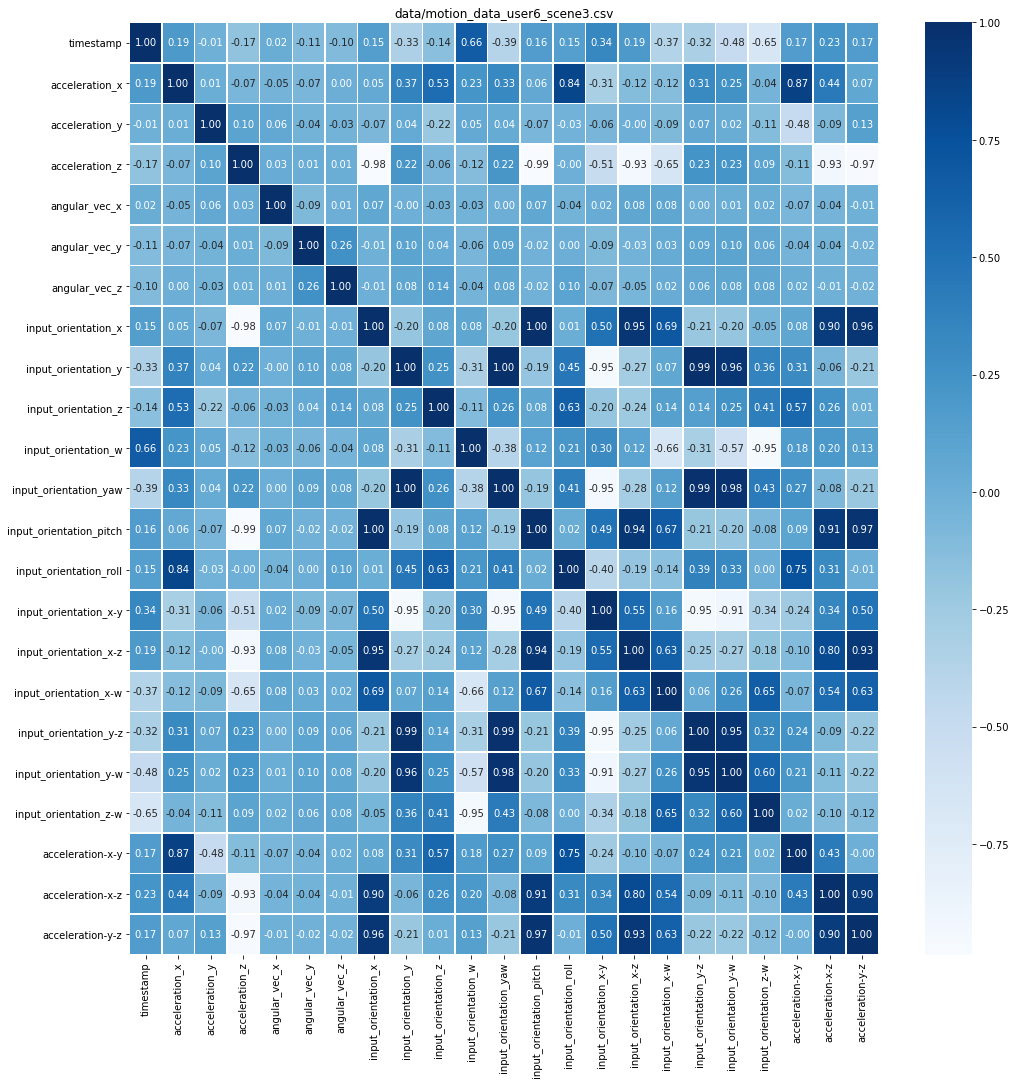

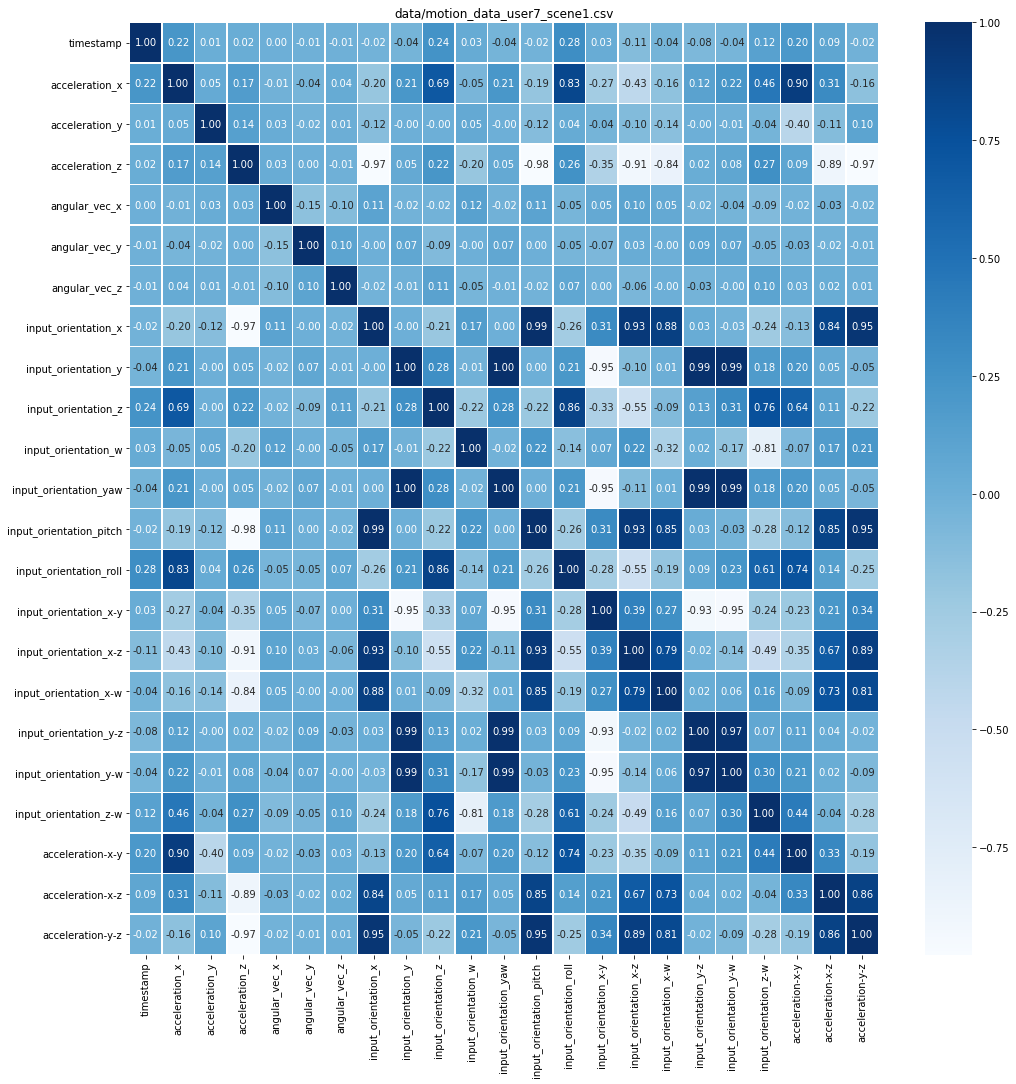

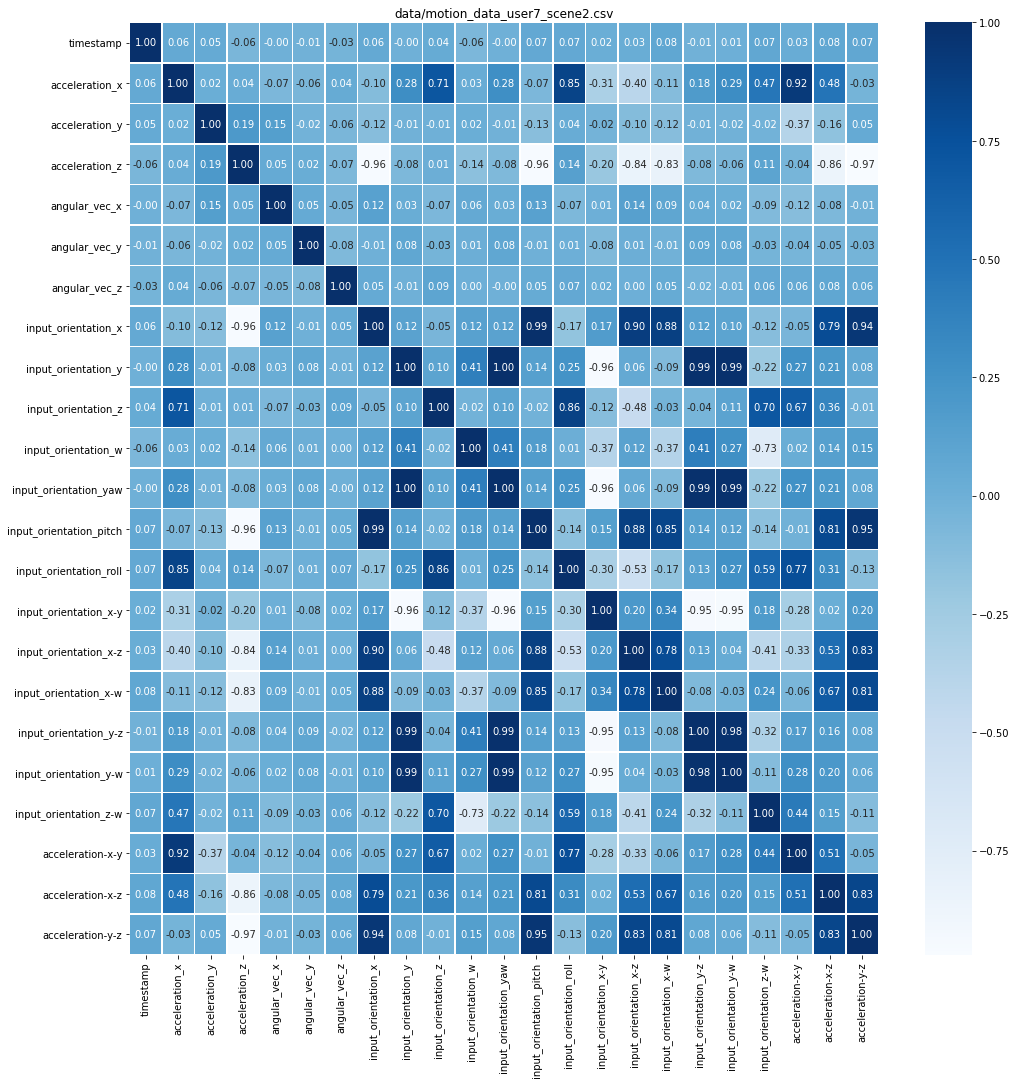

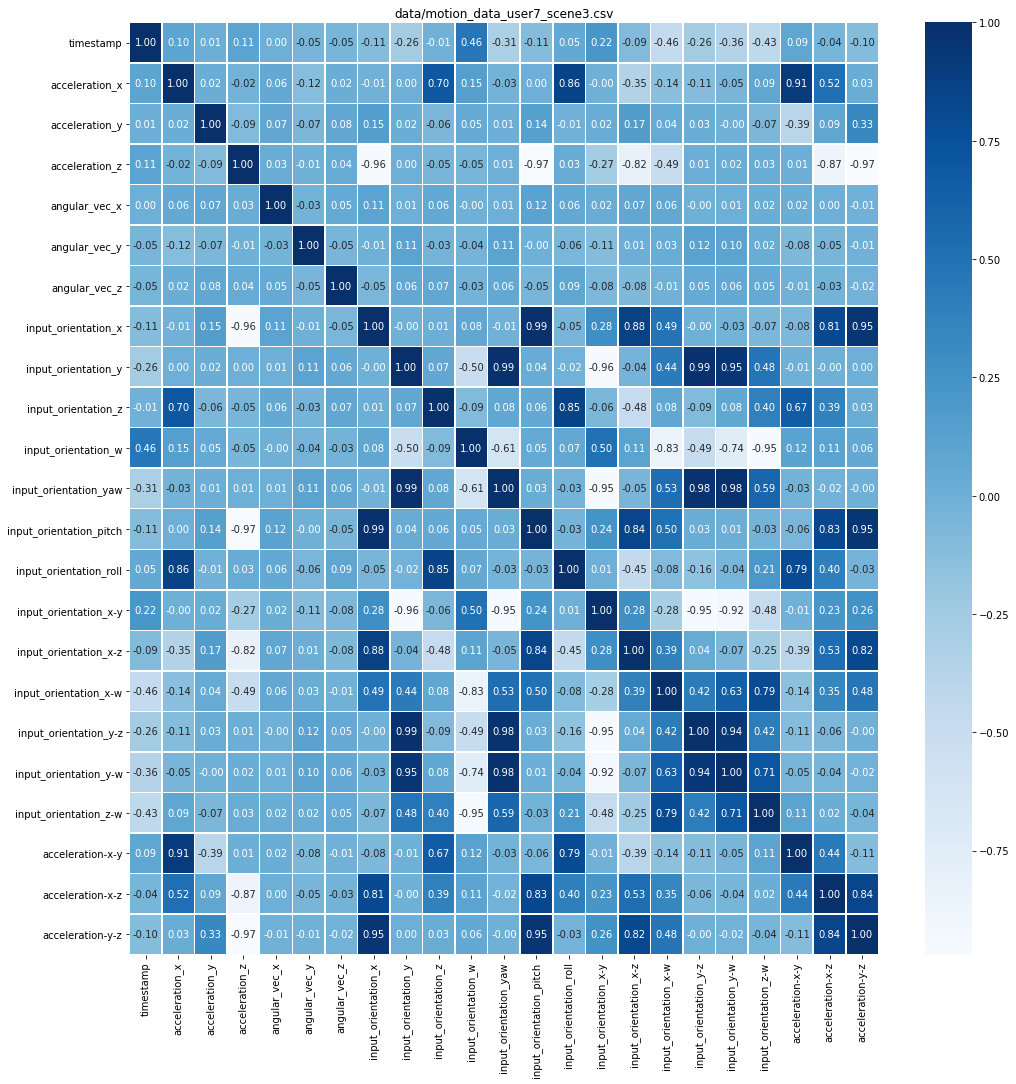

In [73]:
for filename in sorted(list(Path('data').glob('motion_data*.csv'))):
    plot_heatmap(filename)

# 모두 다 합치고, colormap

In [44]:
csv_list = [pd.read_csv(filename) for filename in Path('data').glob('motion_data*')]

In [45]:
total_data = pd.concat(csv_list)

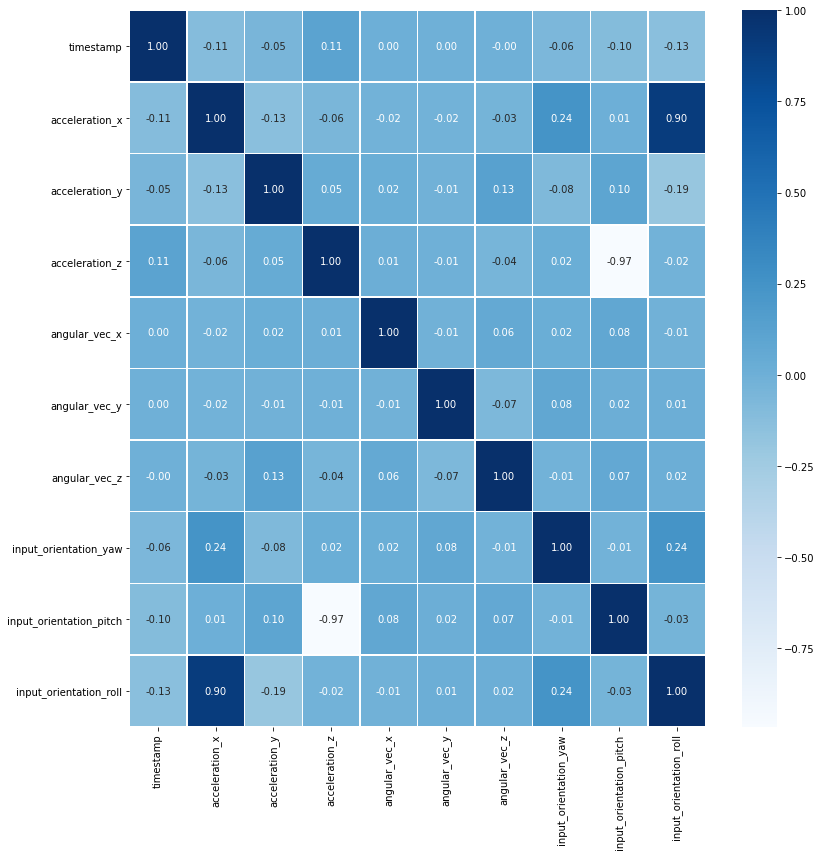

In [46]:
total_data = plot_heatmap(total_data)

In [91]:
total_data.to_csv('data/total_data.csv')

# Time offset

시간 offset을 정확하게 주기 위해서는 index간 timestamp 간격이 일정해야함.

그러므로 interpolation 데이터를 사용한다(user와 scene 정보가 버려짐)

In [47]:
csv_list = [pd.read_csv(filename) for filename in Path('data').glob('interpolation_*.csv')]

In [48]:
total_data = pd.concat(csv_list)

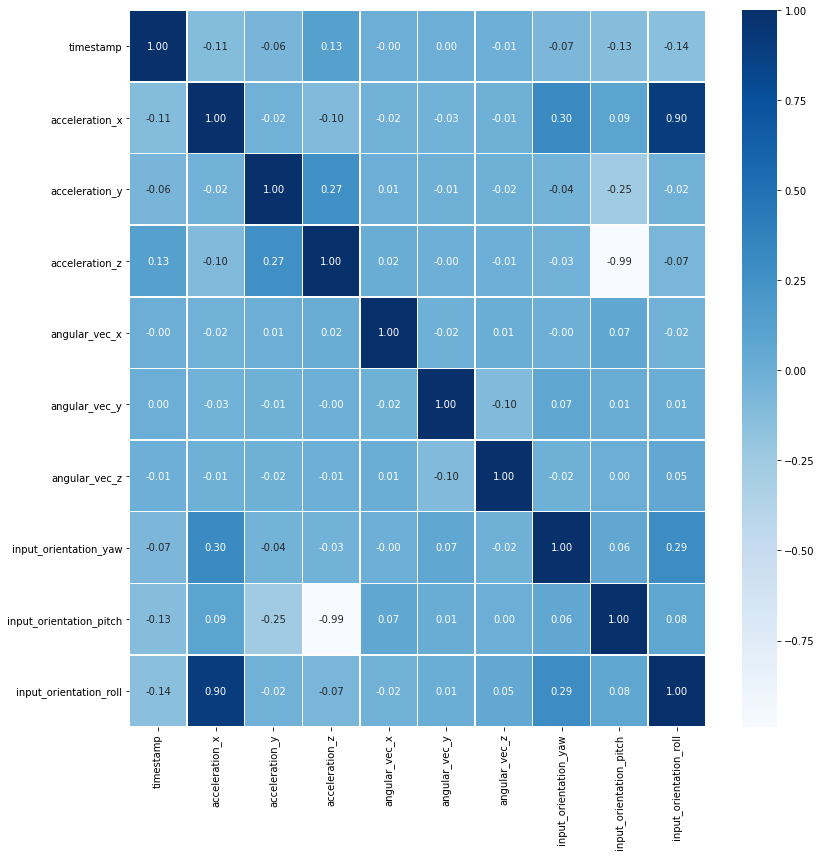

In [49]:
plot_heatmap(total_data)

In [27]:
offset = 18
csv1 = total_data.iloc[:-offset]
csv2 = total_data.iloc[offset:]

AttributeError: 'NoneType' object has no attribute 'iloc'

In [28]:
csv = csv2 - csv1

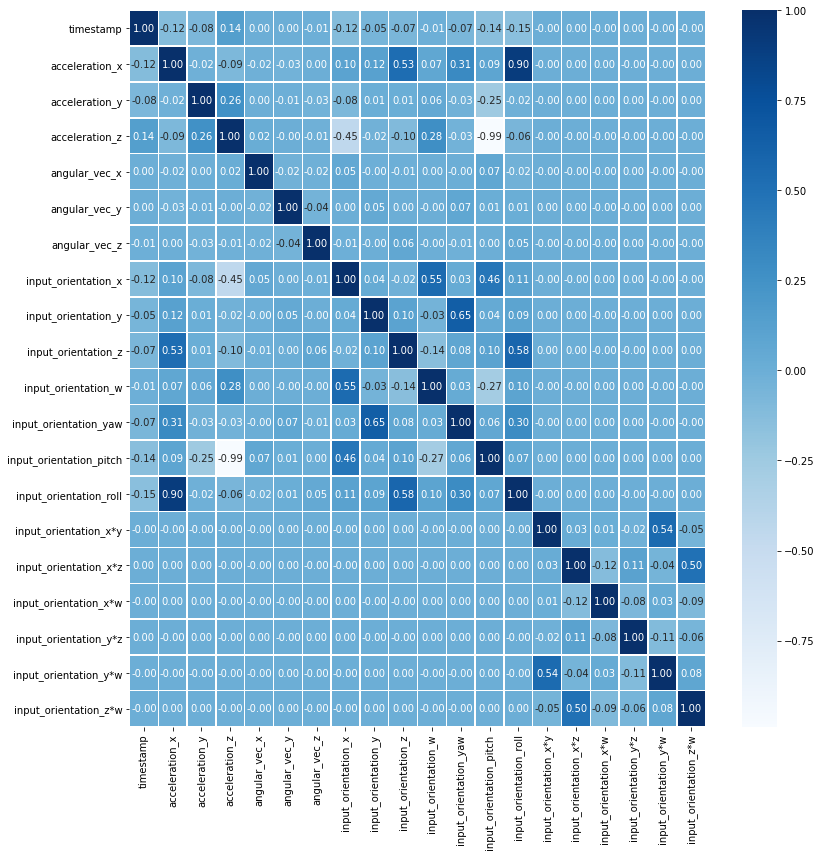

In [37]:
plot_heatmap(csv)

In [3]:
for col in csv.columns:
    csv[f'{col}_{offset}'] = total_data[col].iloc[offset:]

NameError: name 'csv' is not defined

In [ ]:
plot_heatmap(csv)